In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [3]:
# Load the dataset
data = pd.read_csv('/content/combined_data.csv')

# Display the first few rows
print(data.head())


     Experiment  B_Ramp_Angle  B_Diffusor_Angle  B_Trunklid_Angle  \
0  E_S_WWC_WM_1      8.672640          12.26980          -6.93812   
1  E_S_WWC_WM_2     -0.038876          -2.46694           5.82266   
2  E_S_WWC_WM_3      9.576470           6.51376          -5.85023   
3  E_S_WWC_WM_4     10.350600          14.84640           4.04619   
4  E_S_WWC_WM_5     12.971500          10.61980          -6.48716   

   C_Side_Mirrors_Rotation  D_Rear_Window_Inclination  \
0                 10.98820                       1.98   
1                -15.84790                      -1.00   
2                 -1.38529                      -0.55   
3                -10.91980                       1.17   
4                  6.18597                       2.25   

   D_Winscreen_Inclination  C_Side_Mirrors_Translate_X  \
0                    -0.95                    -5.14719   
1                     2.44                    17.49850   
2                     1.44                    -5.29082   
3         

# Performing EDA

In [5]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")


Dataset contains 3747 rows and 26 columns.


In [9]:
print(data.isnull().sum())


Experiment                    0
B_Ramp_Angle                  0
B_Diffusor_Angle              0
B_Trunklid_Angle              0
C_Side_Mirrors_Rotation       0
D_Rear_Window_Inclination     0
D_Winscreen_Inclination       0
C_Side_Mirrors_Translate_X    0
C_Side_Mirrors_Translate_Z    0
D_Winscreen_Length            0
D_Rear_Window_Length          0
E_A_B_C_Pillar_Thickness      0
G_Trunklid_Curvature          0
G_Trunklid_Length             0
H_Front_Bumper_Curvature      0
H_Front_Bumper_Length         0
F_Door_Handles_Thickness      0
F_Door_Handles_Z_Position     0
E_Fenders_Arch_Offset         0
A_Car_Length                  0
F_Door_Handles_X_Position     0
A_Car_Width                   0
A_Car_Roof_Height             0
A_Car_Green_House_Angle       0
Average Cd                    0
Std Cd                        0
dtype: int64


In [10]:
print(data.dtypes)


Experiment                     object
B_Ramp_Angle                  float64
B_Diffusor_Angle              float64
B_Trunklid_Angle              float64
C_Side_Mirrors_Rotation       float64
D_Rear_Window_Inclination     float64
D_Winscreen_Inclination       float64
C_Side_Mirrors_Translate_X    float64
C_Side_Mirrors_Translate_Z    float64
D_Winscreen_Length            float64
D_Rear_Window_Length          float64
E_A_B_C_Pillar_Thickness      float64
G_Trunklid_Curvature          float64
G_Trunklid_Length             float64
H_Front_Bumper_Curvature      float64
H_Front_Bumper_Length         float64
F_Door_Handles_Thickness      float64
F_Door_Handles_Z_Position     float64
E_Fenders_Arch_Offset         float64
A_Car_Length                  float64
F_Door_Handles_X_Position     float64
A_Car_Width                   float64
A_Car_Roof_Height             float64
A_Car_Green_House_Angle       float64
Average Cd                    float64
Std Cd                        float64
dtype: objec

In [12]:
# Summary statistics
data.describe()


,B_Ramp_Angle,B_Diffusor_Angle,B_Trunklid_Angle,C_Side_Mirrors_Rotation,D_Rear_Window_Inclination,D_Winscreen_Inclination,C_Side_Mirrors_Translate_X,C_Side_Mirrors_Translate_Z,D_Winscreen_Length,D_Rear_Window_Length,...,F_Door_Handles_Thickness,F_Door_Handles_Z_Position,E_Fenders_Arch_Offset,A_Car_Length,F_Door_Handles_X_Position,A_Car_Width,A_Car_Roof_Height,A_Car_Green_House_Angle,Average Cd,Std Cd
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,...,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,3.474832,3.435537,5.931821,-0.117027,0.334481,0.337326,5.000215,2.540636,-0.470353,27.106978,...,5.107555,-0.171992,14.864634,35.436974,0.681859,43.904842,14.843401,-24.668229,0.255845,0.006657
std,6.602161,6.675723,8.119145,11.579901,1.231196,1.247723,8.604916,4.299605,28.839275,70.798604,...,14.396548,17.244911,23.218969,54.967253,28.934905,60.398368,43.435249,101.584557,0.022881,0.002235
min,-7.985770,-7.983000,-7.977390,-19.996400,-1.790000,-1.800000,-9.969590,-4.984890,-49.964600,-94.811000,...,-19.960800,-29.982600,-24.941500,-59.912500,-49.995400,-59.816700,-59.983200,-199.761000,0.201138,0.000043
25%,-2.229625,-2.388720,-1.092790,-10.220350,-0.740000,-0.755000,-2.425275,-1.154680,-25.602700,-34.443700,...,-7.231840,-15.146500,-5.650760,-11.891900,-24.210300,-8.281560,-23.001700,-113.917000,0.238350,0.005107
50%,3.520840,3.343170,5.885420,-0.171758,0.350000,0.310000,4.878460,2.566000,-0.620434,27.146000,...,5.158890,-0.360752,14.745900,34.927000,1.269880,42.723100,14.776600,-23.012100,0.255021,0.006333
75%,9.146770,9.309470,13.033000,9.921130,1.385000,1.420000,12.453450,6.253890,24.519700,88.415450,...,17.600300,14.495500,35.197400,84.115000,25.773500,96.122300,52.698600,61.687500,0.272691,0.007850
max,14.999400,14.967200,19.985900,19.960700,2.500000,2.500000,19.970800,9.989460,49.879000,149.948000,...,29.972900,29.990000,54.988500,129.840000,49.991100,149.714000,89.998600,149.899000,0.323905,0.018897


Average Cd ranges from 0.2011383671561462 to 0.3239046290598006


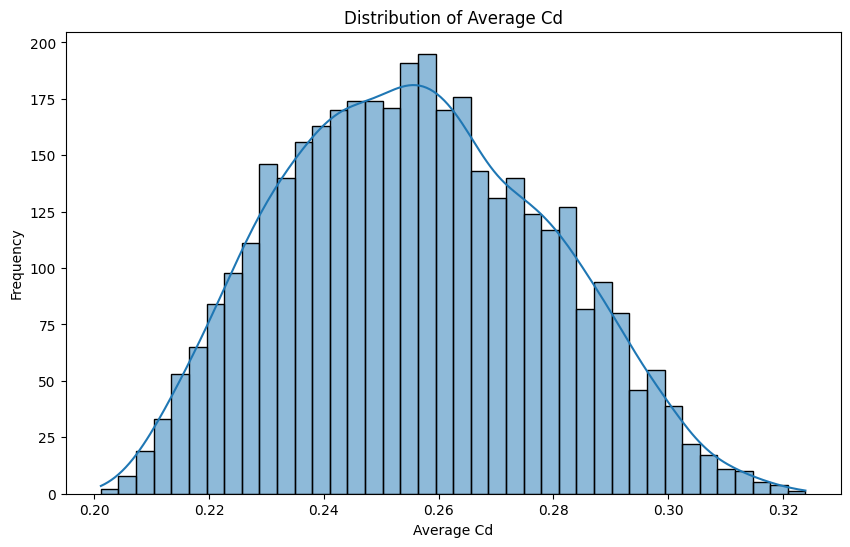

In [15]:
# Range of 'Average Cd'
print(f"Average Cd ranges from {data['Average Cd'].min()} to {data['Average Cd'].max()}")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Average Cd'], kde=True, bins=40)
plt.title('Distribution of Average Cd')
plt.xlabel('Average Cd')
plt.ylabel('Frequency')
plt.show()


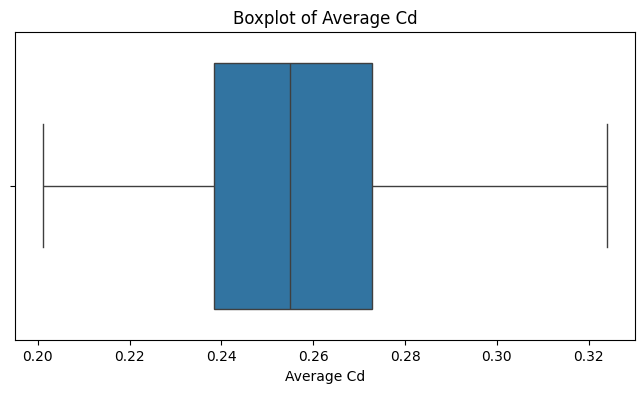

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Average Cd'])
plt.title('Boxplot of Average Cd')
plt.show()


In [24]:
# Calculate correlation matrix
data_1 = data.drop(columns=['Experiment', "Std Cd"])
corr_matrix = data_1.corr()


corr_matrix

,B_Ramp_Angle,B_Diffusor_Angle,B_Trunklid_Angle,C_Side_Mirrors_Rotation,D_Rear_Window_Inclination,D_Winscreen_Inclination,C_Side_Mirrors_Translate_X,C_Side_Mirrors_Translate_Z,D_Winscreen_Length,D_Rear_Window_Length,...,H_Front_Bumper_Length,F_Door_Handles_Thickness,F_Door_Handles_Z_Position,E_Fenders_Arch_Offset,A_Car_Length,F_Door_Handles_X_Position,A_Car_Width,A_Car_Roof_Height,A_Car_Green_House_Angle,Average Cd
B_Ramp_Angle,1.000000,-0.040561,0.007622,-0.010885,-0.016790,-0.005473,0.037009,-0.035714,-0.009576,0.014093,...,-0.005819,0.005888,0.017189,-0.004488,-0.023794,0.005310,-0.059437,-0.021649,0.023183,-0.114841
B_Diffusor_Angle,-0.040561,1.000000,-0.057430,0.009759,-0.022971,-0.036711,0.049678,-0.005153,-0.008333,-0.008725,...,0.005584,-0.005455,-0.014711,0.006615,-0.017161,-0.024827,0.020021,-0.000708,0.018974,0.404573
B_Trunklid_Angle,0.007622,-0.057430,1.000000,-0.021721,0.011520,-0.009774,0.005026,0.006320,-0.017779,0.001137,...,-0.012486,0.038345,0.010499,0.014718,0.018553,-0.018106,-0.021900,0.017753,-0.014396,-0.026649
C_Side_Mirrors_Rotation,-0.010885,0.009759,-0.021721,1.000000,0.016440,-0.001151,-0.016016,0.006387,-0.009655,-0.017858,...,0.006501,0.025909,0.008335,-0.009592,0.002912,0.022471,0.015613,-0.013808,0.000715,-0.049394
D_Rear_Window_Inclination,-0.016790,-0.022971,0.011520,0.016440,1.000000,0.023288,0.010831,-0.003378,-0.016311,-0.028085,...,-0.029885,-0.004913,-0.017367,0.041544,0.021377,0.039065,0.002766,0.021248,-0.001018,0.087303
D_Winscreen_Inclination,-0.005473,-0.036711,-0.009774,-0.001151,0.023288,1.000000,0.023183,-0.035396,0.011431,0.015991,...,0.029464,0.025164,0.049097,0.037535,-0.017311,-0.048052,-0.034534,0.033866,0.005191,-0.030316
C_Side_Mirrors_Translate_X,0.037009,0.049678,0.005026,-0.016016,0.010831,0.023183,1.000000,0.021769,-0.012656,0.025957,...,0.027398,-0.032064,0.030269,0.014131,0.000203,0.020899,-0.000109,-0.024567,-0.050489,0.012332
C_Side_Mirrors_Translate_Z,-0.035714,-0.005153,0.006320,0.006387,-0.003378,-0.035396,0.021769,1.000000,-0.035475,0.038024,...,0.001988,-0.025869,0.006999,0.039528,-0.028799,0.036812,0.018616,0.003867,-0.005295,0.017136
D_Winscreen_Length,-0.009576,-0.008333,-0.017779,-0.009655,-0.016311,0.011431,-0.012656,-0.035475,1.000000,0.005070,...,-0.013198,-0.034301,-0.013749,-0.020278,0.003161,-0.030784,0.002162,0.025830,-0.008520,0.020507
D_Rear_Window_Length,0.014093,-0.008725,0.001137,-0.017858,-0.028085,0.015991,0.025957,0.038024,0.005070,1.000000,...,0.004188,0.030163,0.017989,-0.027941,0.016872,0.002679,-0.025258,0.012936,-0.029759,0.121007


In [25]:
# Correlation with 'Average Cd'
target_corr = corr_matrix['Average Cd'].sort_values(ascending=False)
print(target_corr)

Average Cd                    1.000000
E_Fenders_Arch_Offset         0.418137
B_Diffusor_Angle              0.404573
D_Rear_Window_Length          0.121007
D_Rear_Window_Inclination     0.087303
D_Winscreen_Length            0.020507
C_Side_Mirrors_Translate_Z    0.017136
F_Door_Handles_Thickness      0.013361
C_Side_Mirrors_Translate_X    0.012332
A_Car_Green_House_Angle       0.011741
F_Door_Handles_Z_Position     0.010706
A_Car_Roof_Height            -0.015105
B_Trunklid_Angle             -0.026649
D_Winscreen_Inclination      -0.030316
G_Trunklid_Length            -0.036682
H_Front_Bumper_Curvature     -0.036839
H_Front_Bumper_Length        -0.048587
C_Side_Mirrors_Rotation      -0.049394
F_Door_Handles_X_Position    -0.052112
G_Trunklid_Curvature         -0.075310
A_Car_Width                  -0.106853
B_Ramp_Angle                 -0.114841
A_Car_Length                 -0.190986
E_A_B_C_Pillar_Thickness     -0.308418
Name: Average Cd, dtype: float64


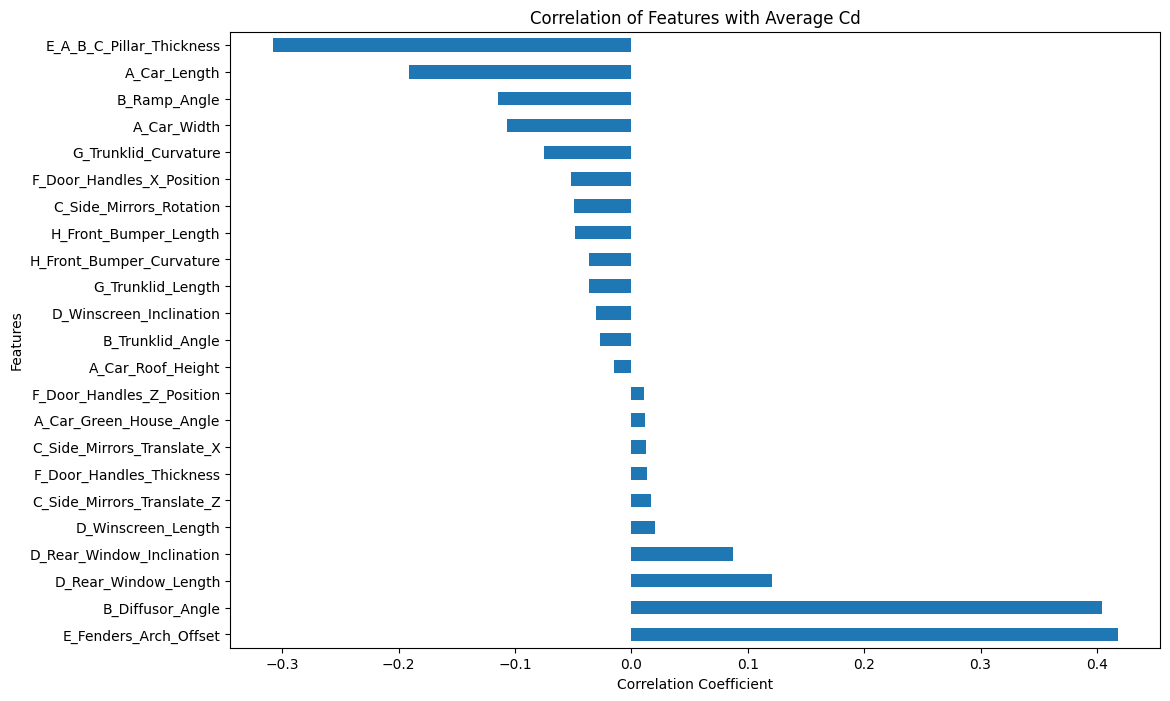

In [29]:
# Plot correlations with 'Average Cd'
plt.figure(figsize=(12, 8))
target_corr.drop('Average Cd').plot(kind='barh')
plt.title('Correlation of Features with Average Cd')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [27]:
# Top 5 positive correlations
print("Top 5 features positively correlated with Average Cd:")
print(target_corr.drop('Average Cd').head(5))

# Top 5 negative correlations
print("\nTop 5 features negatively correlated with Average Cd:")
print(target_corr.drop('Average Cd').tail(5))


Top 5 features positively correlated with Average Cd:
E_Fenders_Arch_Offset        0.418137
B_Diffusor_Angle             0.404573
D_Rear_Window_Length         0.121007
D_Rear_Window_Inclination    0.087303
D_Winscreen_Length           0.020507
Name: Average Cd, dtype: float64

Top 5 features negatively correlated with Average Cd:
G_Trunklid_Curvature       -0.075310
A_Car_Width                -0.106853
B_Ramp_Angle               -0.114841
A_Car_Length               -0.190986
E_A_B_C_Pillar_Thickness   -0.308418
Name: Average Cd, dtype: float64


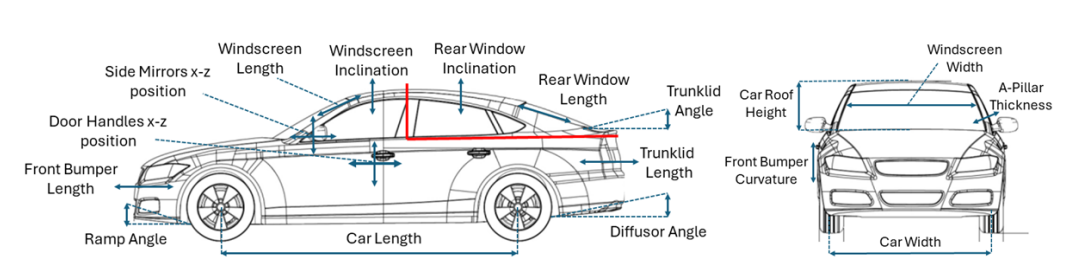

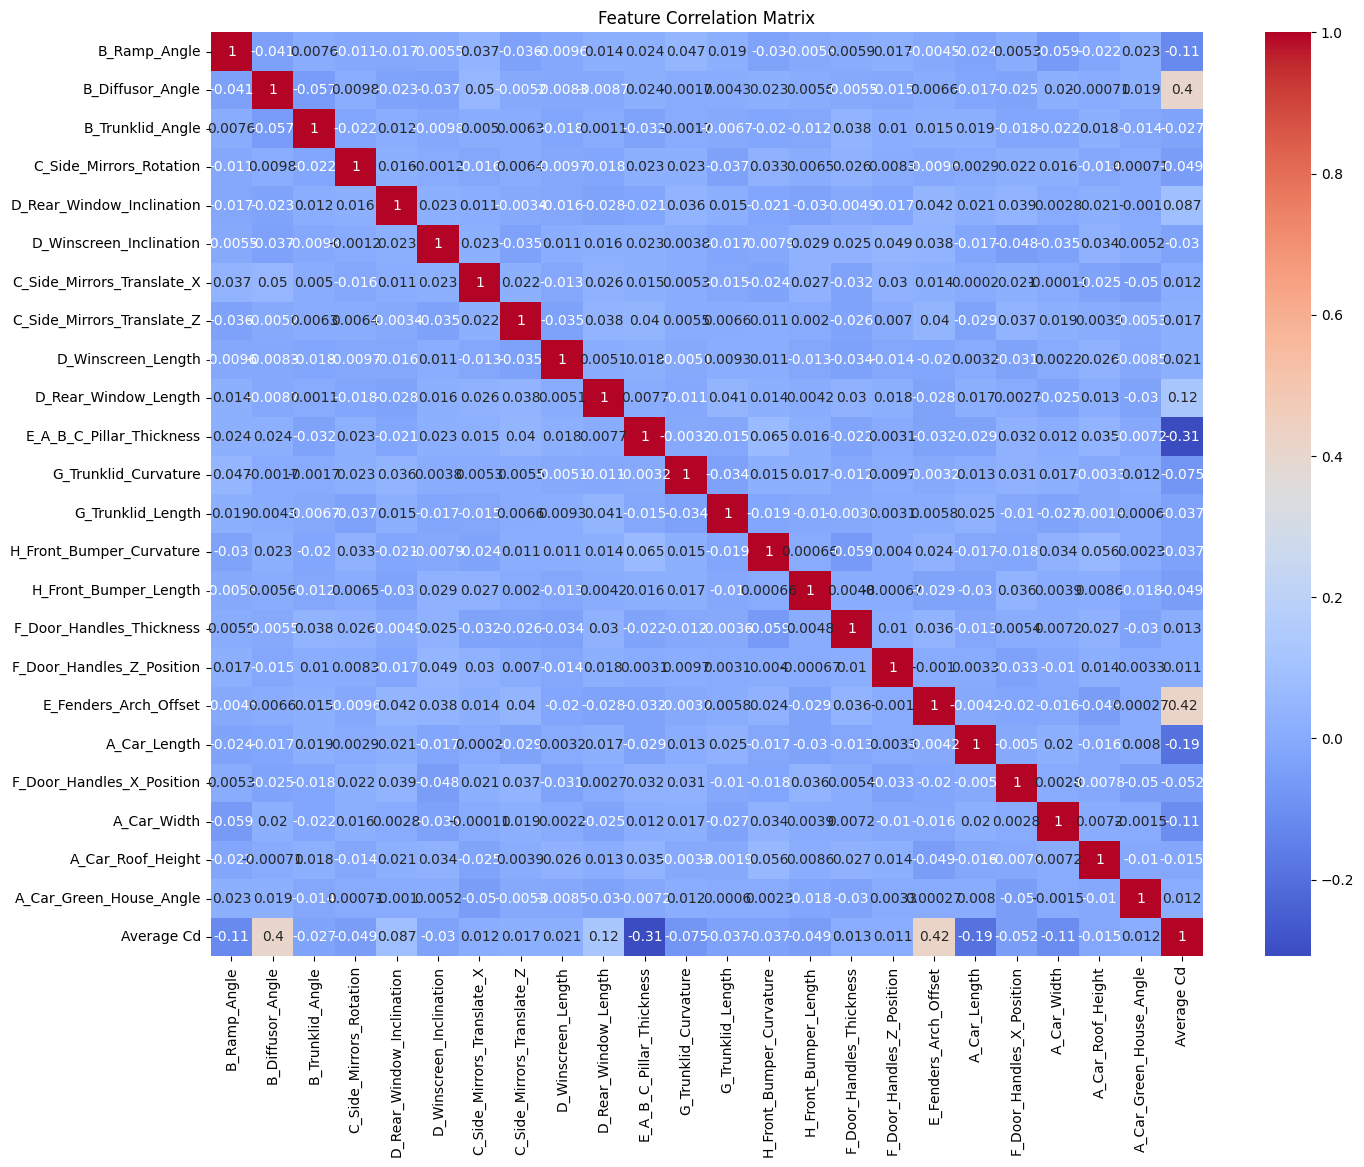

In [34]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [46]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 or less than -0.8
high_corr = [column for column in upper.columns if any((upper[column] > 0.3) | (upper[column] < -0.3))]


print("Highly correlated features (>|0.3|):")
for column in high_corr:
    print(f"{column}:")
    print(upper[column][(upper[column] > 0.3) | (upper[column] < -0.3)])
    print("-------")


Highly correlated features (>|0.3|):
Average Cd:
B_Diffusor_Angle            0.404573
E_A_B_C_Pillar_Thickness   -0.308418
E_Fenders_Arch_Offset       0.418137
Name: Average Cd, dtype: float64
-------
